# Fitcont
Example illustrating how to draw the n-sigma contour of a Minuit fit.
To get the n-sigma contour the ERRDEF parameter in Minuit has to set
to n^2. The fcn function has to be set before the routine is called.

WARNING!!! This test works only with TMinuit

The TGraph object is created via the interpreter. The user must cast it
to a TGraph*




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:28 AM.</small></i>

In [1]:
#include "TMinuit.h"

Be sure default is minuit since we will use gminuit

In [2]:
TVirtualFitter::SetDefaultFitter("Minuit");

TCanvas *c1 = new TCanvas("c1");
TH1F *h = new TH1F("h","My histogram",100,-3,3);
h->FillRandom("gaus",6000);
h->Fit("gaus");
c1->Update();

TCanvas *c2 = new TCanvas("c2","contours",10,10,600,800);
c2->Divide(1,2);
c2->cd(1);
/*get first contour for parameter 1 versus parameter 2*/
TGraph *gr12 = (TGraph*)gMinuit->Contour(40,1,2);
gr12->Draw("alp");
c2->cd(2);
/*Get contour for parameter 0 versus parameter 2  for ERRDEF=2*/
gMinuit->SetErrorDef(4); //note 4 and not 2!
TGraph *gr2 = (TGraph*)gMinuit->Contour(80,0,2);
gr2->SetFillColor(42);
gr2->Draw("alf");
/*Get contour for parameter 0 versus parameter 2 for ERRDEF=1*/
gMinuit->SetErrorDef(1);
TGraph *gr1 = (TGraph*)gMinuit->Contour(80,0,2);
gr1->SetFillColor(38);
gr1->Draw("lf");

 FCN=96.6163 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=2.07594e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.43454e+02   2.29666e+00   9.00732e-03  -6.49594e-05
   2  Mean         1.60911e-02   1.30402e-02   6.28520e-05   3.57225e-03
   3  Sigma        9.87683e-01   9.45637e-03   1.24479e-05   2.14428e-02


Draw all canvases 

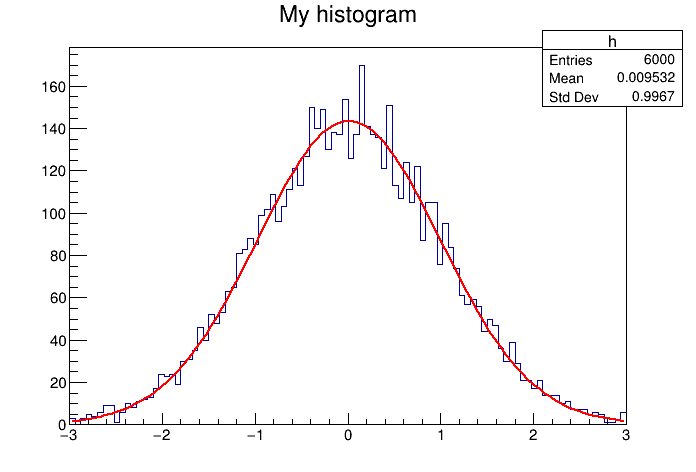

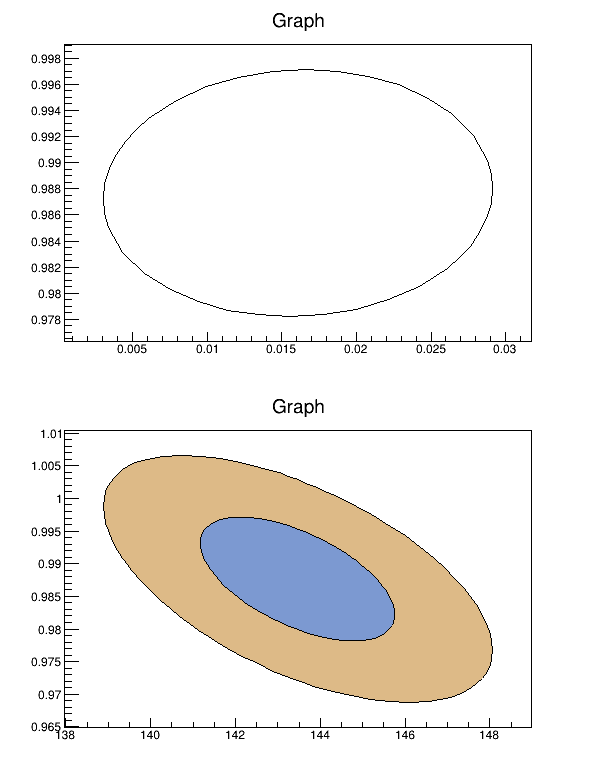

In [3]:
gROOT->GetListOfCanvases()->Draw()